In [116]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [117]:
conn = sqlite3.connect('MatchDB.db')
df = pd.read_sql_query("SELECT * FROM Games WHERE League = 'Premier League' AND Country = 'ENG'", conn)

In [118]:
df = df.drop(['HomeTeam', 'AwayTeam', 'League', 'Country', 'date', 'id', 'match_id', 'HomexG', 'AwayxG'], axis=1)
# df = df.drop(['AwayPoss', 'AwayShots', 'AwaySonT', 'AwaySoffT', 'AwayBS', 'AwayCor', 'AwayOff', 'AwayFoul', 'AwayYellow', 'AwayPass', 'AwayAccPass', 'AwayPassOff', 'AwayAccLongB', 'AwayAccLongBpercent', 'AwayAccCross', 'AwayAccCrosspercent', 'AwaySuccDribb', 'AwaySuccDribbpercent', 'AwayDuelsW', 'AwayTackW', 'AwayTackWpercent', 'AwayInt', 'AwayClear'], axis= 1)
df = df.dropna()

In [119]:
def compare_values(row):
    if row['HGoals'] > row['AGoals']:
        return 0
    elif row['AGoals'] > row['HGoals']:
        return 1
    else:
        return 2
    
df['Winner'] = df.apply(compare_values, axis= 1)

In [120]:
from tensorflow.keras.utils import to_categorical 
prediction = df.drop(['HGoals', 'AGoals'], axis=1).astype(float)
target_1 = df['Winner'].astype(float)

target_1 = to_categorical(target_1)

X_train, X_test, y_train, y_test = train_test_split(prediction, target_1, test_size=0.2, random_state=42)

In [121]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [122]:
n_cols = len(X_train.columns)
input_shape = (n_cols,)

In [123]:

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [124]:
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=lr_schedule)

model = Sequential()

model.add(Dense(250, activation = 'relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(Dense(200, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation = 'sigmoid'))

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 50)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(X_train, y_train,
                 validation_split = 0.2,
                 epochs = 500,
                 callbacks = [early_stopping]
                )

Epoch 1/500
28/28 [==============================] - 2s 3ms/step - loss: 1.2569 - accuracy: 0.3960
Epoch 2/500
28/28 [==============================] - 0s 3ms/step - loss: 0.9742 - accuracy: 0.5268
Epoch 3/500
28/28 [==============================] - 0s 4ms/step - loss: 0.8744 - accuracy: 0.6286
Epoch 4/500
28/28 [==============================] - 0s 3ms/step - loss: 0.8122 - accuracy: 0.6286
Epoch 5/500
28/28 [==============================] - 0s 3ms/step - loss: 0.7489 - accuracy: 0.6723
Epoch 6/500
28/28 [==============================] - 0s 3ms/step - loss: 0.7356 - accuracy: 0.6846
Epoch 7/500
28/28 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.7159
Epoch 8/500
28/28 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.7125
Epoch 9/500
28/28 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.7383
Epoch 10/500
28/28 [==============================] - 0s 3ms/step - loss: 0.5558 - accuracy: 0.7584
Epoch 11/

In [125]:
result = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9955


KeyError: 'val_accuracy'

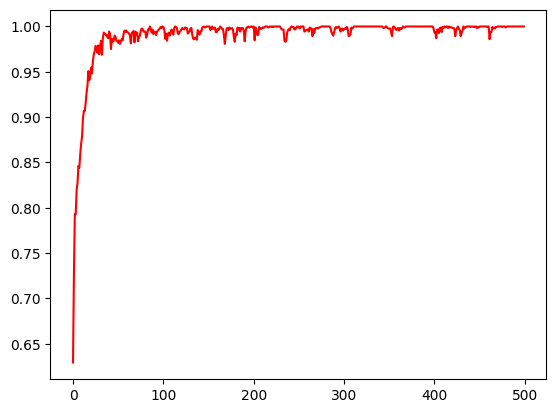

In [126]:
plt.plot(np.sqrt(hist.history['accuracy']), 'r', label='Training accuracy')
plt.plot(np.sqrt(hist.history['val_accuracy']), 'b', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

In [127]:
print(hist.history['accuracy'])
best_score = max(hist.history['accuracy'])
# best_score2 = min(hist.history['val_loss'])
print(best_score)




[0.3959731459617615, 0.5268456339836121, 0.6286353468894958, 0.6286353468894958, 0.672259509563446, 0.6845637559890747, 0.7158836722373962, 0.7125279903411865, 0.7382550239562988, 0.7583892345428467, 0.7718120813369751, 0.8076062798500061, 0.8221476674079895, 0.8221476674079895, 0.8389261960983276, 0.8590604066848755, 0.8736017942428589, 0.9038031101226807, 0.8847874999046326, 0.8926174640655518, 0.9116331338882446, 0.899328887462616, 0.9250559210777283, 0.9395973086357117, 0.9463087320327759, 0.9574943780899048, 0.9530201554298401, 0.9429529905319214, 0.9586129784584045, 0.9395973086357117, 0.9563758373260498, 0.9686800837516785, 0.9384787678718567, 0.9742729067802429, 0.9865771532058716, 0.9843400716781616, 0.9821029305458069, 0.9821029305458069, 0.9765100479125977, 0.9742729067802429, 0.9888142943382263, 0.9832214713096619, 0.9507830142974854, 0.9731543660163879, 0.9664429426193237, 0.9686800837516785, 0.9798657894134521, 0.9776286482810974, 0.9686800837516785, 0.9675615429878235, 0

In [128]:
print(y_test.shape)

(224, 3)


In [129]:
model.save('model_file.h5')

c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
